## Loading Data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [3]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False, num_workers=2)

## Training and Testing Utils

In [5]:
import time
from tqdm import tqdm

In [6]:
def train_model(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    model.to(device)

    train_loss_history = []
    train_accuracy_history = []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()

        train_loss, train_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

            predicted = outputs.argmax(dim=1)
            train_corrects += (predicted == labels).sum().item()
    
        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = train_corrects / len(train_loader.dataset)

        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)
        
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    
    end_time = time.time()

    print(f'Finished Training. Total training time: {end_time - start_time:.2f} seconds.')

    return train_loss_history, train_accuracy_history

## Loading Models

In [7]:
from models import lnn, cnn, transformer
from matplotlib import pyplot as plt

In [8]:
lnn_model = lnn.LNN(32 * 32 * 3, num_classes=10)

num_params = sum([p.numel() for p in lnn_model.parameters()])
print("Number of parameters: ", num_params)

Number of parameters:  33475330


In [9]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lnn_model.parameters(), lr=0.001)

train_loss_history, train_accuracy_history = train_model(lnn_model, train_loader, criterion, optimizer, epochs=60, device='cuda')

Epoch 1/60: 100%|██████████| 1563/1563 [00:38<00:00, 40.47it/s]


Train Loss: 1.7443, Train Accuracy: 0.3804


Epoch 2/60: 100%|██████████| 1563/1563 [00:47<00:00, 32.85it/s]


Train Loss: 1.5269, Train Accuracy: 0.4620


Epoch 3/60: 100%|██████████| 1563/1563 [00:33<00:00, 46.27it/s]


Train Loss: 1.4188, Train Accuracy: 0.5022


Epoch 4/60: 100%|██████████| 1563/1563 [00:35<00:00, 44.13it/s]


Train Loss: 1.3402, Train Accuracy: 0.5286


Epoch 5/60: 100%|██████████| 1563/1563 [00:44<00:00, 35.04it/s]


Train Loss: 1.2661, Train Accuracy: 0.5556


Epoch 6/60: 100%|██████████| 1563/1563 [00:22<00:00, 68.68it/s]


Train Loss: 1.2025, Train Accuracy: 0.5814


Epoch 7/60: 100%|██████████| 1563/1563 [00:19<00:00, 78.52it/s]


Train Loss: 1.1242, Train Accuracy: 0.6074


Epoch 8/60: 100%|██████████| 1563/1563 [00:18<00:00, 82.80it/s]


Train Loss: 1.0688, Train Accuracy: 0.6267


Epoch 9/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.22it/s]


Train Loss: 1.0050, Train Accuracy: 0.6504


Epoch 10/60: 100%|██████████| 1563/1563 [00:20<00:00, 77.35it/s]


Train Loss: 0.9514, Train Accuracy: 0.6670


Epoch 11/60: 100%|██████████| 1563/1563 [00:19<00:00, 81.48it/s]


Train Loss: 0.9001, Train Accuracy: 0.6863


Epoch 12/60: 100%|██████████| 1563/1563 [00:20<00:00, 74.80it/s]


Train Loss: 0.8562, Train Accuracy: 0.7035


Epoch 13/60: 100%|██████████| 1563/1563 [00:18<00:00, 86.62it/s]


Train Loss: 0.8047, Train Accuracy: 0.7218


Epoch 14/60: 100%|██████████| 1563/1563 [00:18<00:00, 84.24it/s]


Train Loss: 0.7669, Train Accuracy: 0.7350


Epoch 15/60: 100%|██████████| 1563/1563 [00:17<00:00, 89.35it/s]


Train Loss: 0.7318, Train Accuracy: 0.7479


Epoch 16/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.92it/s]


Train Loss: 0.6902, Train Accuracy: 0.7617


Epoch 17/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.81it/s]


Train Loss: 0.6703, Train Accuracy: 0.7704


Epoch 18/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.40it/s]


Train Loss: 0.6295, Train Accuracy: 0.7836


Epoch 19/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.19it/s]


Train Loss: 0.6160, Train Accuracy: 0.7912


Epoch 20/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.90it/s]


Train Loss: 0.5832, Train Accuracy: 0.8025


Epoch 21/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.18it/s]


Train Loss: 0.5580, Train Accuracy: 0.8094


Epoch 22/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.66it/s]


Train Loss: 0.5441, Train Accuracy: 0.8151


Epoch 23/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.14it/s]


Train Loss: 0.5383, Train Accuracy: 0.8186


Epoch 24/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.21it/s]


Train Loss: 0.5124, Train Accuracy: 0.8281


Epoch 25/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.06it/s]


Train Loss: 0.4809, Train Accuracy: 0.8389


Epoch 26/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.29it/s]


Train Loss: 0.4668, Train Accuracy: 0.8433


Epoch 27/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.27it/s]


Train Loss: 0.4610, Train Accuracy: 0.8470


Epoch 28/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.34it/s]


Train Loss: 0.4569, Train Accuracy: 0.8481


Epoch 29/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.22it/s]


Train Loss: 0.4466, Train Accuracy: 0.8518


Epoch 30/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.30it/s]


Train Loss: 0.4296, Train Accuracy: 0.8588


Epoch 31/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.48it/s]


Train Loss: 0.4123, Train Accuracy: 0.8643


Epoch 32/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.04it/s]


Train Loss: 0.4221, Train Accuracy: 0.8633


Epoch 33/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.32it/s]


Train Loss: 0.3865, Train Accuracy: 0.8739


Epoch 34/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.67it/s]


Train Loss: 0.3937, Train Accuracy: 0.8730


Epoch 35/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.77it/s]


Train Loss: 0.3880, Train Accuracy: 0.8736


Epoch 36/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.41it/s]


Train Loss: 0.3876, Train Accuracy: 0.8738


Epoch 37/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.29it/s]


Train Loss: 0.3611, Train Accuracy: 0.8838


Epoch 38/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.44it/s]


Train Loss: 0.3711, Train Accuracy: 0.8796


Epoch 39/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.87it/s]


Train Loss: 0.3746, Train Accuracy: 0.8798


Epoch 40/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.03it/s]


Train Loss: 0.3533, Train Accuracy: 0.8877


Epoch 41/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.10it/s]


Train Loss: 0.3413, Train Accuracy: 0.8905


Epoch 42/60: 100%|██████████| 1563/1563 [00:17<00:00, 89.38it/s]


Train Loss: 0.3475, Train Accuracy: 0.8903


Epoch 43/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.26it/s]


Train Loss: 0.3414, Train Accuracy: 0.8923


Epoch 44/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.81it/s]


Train Loss: 0.3276, Train Accuracy: 0.8958


Epoch 45/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.53it/s]


Train Loss: 0.3153, Train Accuracy: 0.9006


Epoch 46/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.96it/s]


Train Loss: 0.3284, Train Accuracy: 0.8970


Epoch 47/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.52it/s]


Train Loss: 0.3108, Train Accuracy: 0.9014


Epoch 48/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.67it/s]


Train Loss: 0.3042, Train Accuracy: 0.9032


Epoch 49/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.42it/s]


Train Loss: 0.3053, Train Accuracy: 0.9036


Epoch 50/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.25it/s]


Train Loss: 0.3149, Train Accuracy: 0.9020


Epoch 51/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.54it/s]


Train Loss: 0.3063, Train Accuracy: 0.9046


Epoch 52/60: 100%|██████████| 1563/1563 [00:16<00:00, 91.97it/s]


Train Loss: 0.2950, Train Accuracy: 0.9081


Epoch 53/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.90it/s]


Train Loss: 0.3109, Train Accuracy: 0.9052


Epoch 54/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.16it/s]


Train Loss: 0.2851, Train Accuracy: 0.9118


Epoch 55/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.63it/s]


Train Loss: 0.2980, Train Accuracy: 0.9089


Epoch 56/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.16it/s]


Train Loss: 0.2951, Train Accuracy: 0.9102


Epoch 57/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.88it/s]


Train Loss: 0.2884, Train Accuracy: 0.9129


Epoch 58/60: 100%|██████████| 1563/1563 [00:17<00:00, 90.92it/s]


Train Loss: 0.2823, Train Accuracy: 0.9145


Epoch 59/60: 100%|██████████| 1563/1563 [00:16<00:00, 92.18it/s]


Train Loss: 0.2785, Train Accuracy: 0.9142


Epoch 60/60: 100%|██████████| 1563/1563 [00:17<00:00, 91.46it/s]

Train Loss: 0.2870, Train Accuracy: 0.9133
Finished Training. Total training time: 1162.97 seconds.


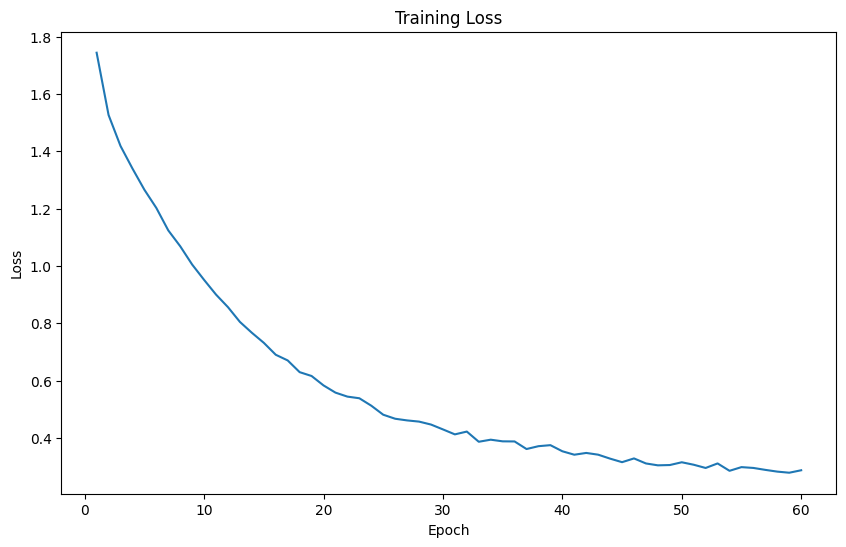

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

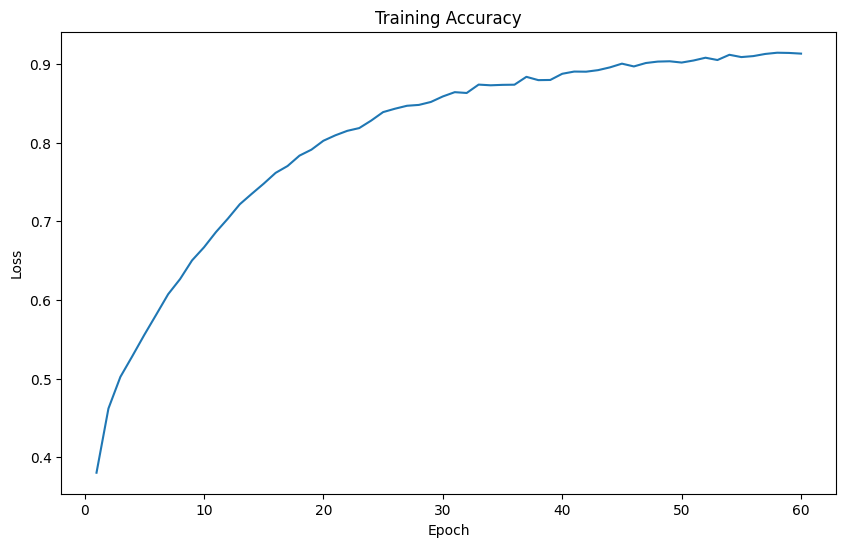

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy_history) + 1), train_accuracy_history)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [12]:
cnn_model = cnn.CNN(3, num_classes=10)

num_params = sum([p.numel() for p in cnn_model.parameters()])
print("Number of parameters: ", num_params)

Number of parameters:  1107538


In [13]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

train_loss_history, train_accuracy_history = train_model(cnn_model, train_loader, criterion, optimizer, epochs=30, device='cuda')

Epoch 1/30: 100%|██████████| 1563/1563 [00:06<00:00, 246.82it/s]


Train Loss: 1.2409, Train Accuracy: 0.5478


Epoch 2/30: 100%|██████████| 1563/1563 [00:05<00:00, 260.81it/s]


Train Loss: 0.8226, Train Accuracy: 0.7105


Epoch 3/30: 100%|██████████| 1563/1563 [00:05<00:00, 268.17it/s]


Train Loss: 0.6723, Train Accuracy: 0.7618


Epoch 4/30: 100%|██████████| 1563/1563 [00:06<00:00, 246.26it/s]


Train Loss: 0.5714, Train Accuracy: 0.7997


Epoch 5/30: 100%|██████████| 1563/1563 [00:06<00:00, 241.85it/s]


Train Loss: 0.4948, Train Accuracy: 0.8257


Epoch 6/30: 100%|██████████| 1563/1563 [00:06<00:00, 256.13it/s]


Train Loss: 0.4259, Train Accuracy: 0.8490


Epoch 7/30: 100%|██████████| 1563/1563 [00:06<00:00, 253.15it/s]


Train Loss: 0.3618, Train Accuracy: 0.8719


Epoch 8/30: 100%|██████████| 1563/1563 [00:06<00:00, 252.15it/s]


Train Loss: 0.3119, Train Accuracy: 0.8891


Epoch 9/30: 100%|██████████| 1563/1563 [00:06<00:00, 254.26it/s]


Train Loss: 0.2622, Train Accuracy: 0.9070


Epoch 10/30: 100%|██████████| 1563/1563 [00:06<00:00, 255.57it/s]


Train Loss: 0.2220, Train Accuracy: 0.9211


Epoch 11/30: 100%|██████████| 1563/1563 [00:06<00:00, 255.98it/s]


Train Loss: 0.1869, Train Accuracy: 0.9332


Epoch 12/30: 100%|██████████| 1563/1563 [00:06<00:00, 253.28it/s]


Train Loss: 0.1565, Train Accuracy: 0.9451


Epoch 13/30: 100%|██████████| 1563/1563 [00:06<00:00, 250.59it/s]


Train Loss: 0.1375, Train Accuracy: 0.9517


Epoch 14/30: 100%|██████████| 1563/1563 [00:06<00:00, 255.18it/s]


Train Loss: 0.1214, Train Accuracy: 0.9572


Epoch 15/30: 100%|██████████| 1563/1563 [00:06<00:00, 252.77it/s]


Train Loss: 0.1044, Train Accuracy: 0.9621


Epoch 16/30: 100%|██████████| 1563/1563 [00:06<00:00, 255.02it/s]


Train Loss: 0.0980, Train Accuracy: 0.9651


Epoch 17/30: 100%|██████████| 1563/1563 [00:06<00:00, 253.71it/s]


Train Loss: 0.0891, Train Accuracy: 0.9683


Epoch 18/30: 100%|██████████| 1563/1563 [00:06<00:00, 240.96it/s]


Train Loss: 0.0881, Train Accuracy: 0.9687


Epoch 19/30: 100%|██████████| 1563/1563 [00:06<00:00, 246.56it/s]


Train Loss: 0.0773, Train Accuracy: 0.9732


Epoch 20/30: 100%|██████████| 1563/1563 [00:06<00:00, 251.48it/s]


Train Loss: 0.0704, Train Accuracy: 0.9749


Epoch 21/30: 100%|██████████| 1563/1563 [00:06<00:00, 241.82it/s]


Train Loss: 0.0675, Train Accuracy: 0.9766


Epoch 22/30: 100%|██████████| 1563/1563 [00:06<00:00, 240.44it/s]


Train Loss: 0.0667, Train Accuracy: 0.9770


Epoch 23/30: 100%|██████████| 1563/1563 [00:06<00:00, 252.96it/s]


Train Loss: 0.0616, Train Accuracy: 0.9782


Epoch 24/30: 100%|██████████| 1563/1563 [00:06<00:00, 253.73it/s]


Train Loss: 0.0534, Train Accuracy: 0.9814


Epoch 25/30: 100%|██████████| 1563/1563 [00:06<00:00, 248.11it/s]


Train Loss: 0.0584, Train Accuracy: 0.9797


Epoch 26/30: 100%|██████████| 1563/1563 [00:06<00:00, 251.95it/s]


Train Loss: 0.0558, Train Accuracy: 0.9810


Epoch 27/30: 100%|██████████| 1563/1563 [00:06<00:00, 253.45it/s]


Train Loss: 0.0582, Train Accuracy: 0.9803


Epoch 28/30: 100%|██████████| 1563/1563 [00:06<00:00, 251.83it/s]


Train Loss: 0.0495, Train Accuracy: 0.9828


Epoch 29/30: 100%|██████████| 1563/1563 [00:06<00:00, 251.95it/s]


Train Loss: 0.0477, Train Accuracy: 0.9836


Epoch 30/30: 100%|██████████| 1563/1563 [00:06<00:00, 252.41it/s]


Train Loss: 0.0501, Train Accuracy: 0.9823
Finished Training. Total training time: 186.50 seconds.


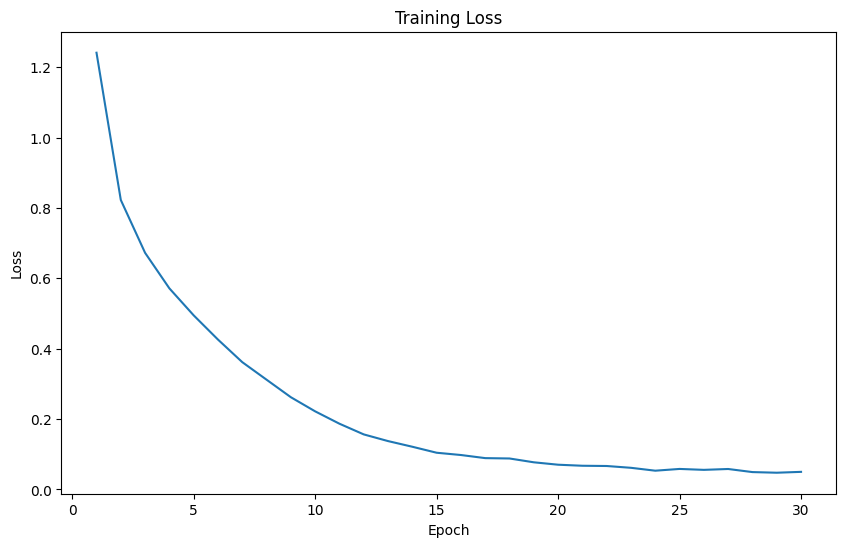

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

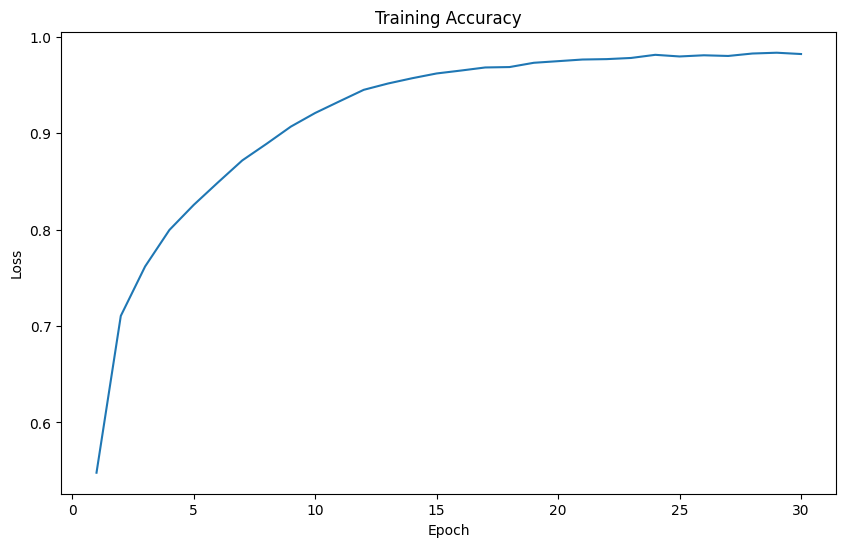

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy_history) + 1), train_accuracy_history)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();